In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station 

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

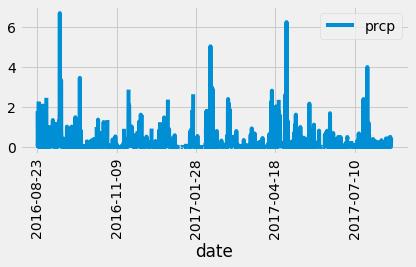

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# session.query(measurement.station).group_by(measurement.station).all()

# Calculate the date 1 year ago from the last data point in the database
date = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores

combined_obj = session.query(measurement.date, measurement.prcp)\
.filter(measurement.date >= date).all()
combined_obj
  
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(combined_obj).set_index('date')
prcp_df

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='date')
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=90)
plt.tight_layout()
plt.show()

In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# Design a query to show how many stations are available in this dataset?
session.query(station.station).all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [12]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station)\
.order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#Hint: You may need to use functions such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs),\
func.avg(measurement.tobs), func.count(measurement.tobs)).group_by(measurement.station)\
.order_by(func.count(measurement.tobs)).all()

[('USC00518838', 58.0, 83.0, 72.72407045009784, 511),
 ('USC00517948', 58.0, 87.0, 74.68440233236151, 1372),
 ('USC00511918', 53.0, 87.0, 71.61596766043456, 1979),
 ('USC00514830', 58.0, 85.0, 74.8732970027248, 2202),
 ('USC00516128', 58.0, 84.0, 70.91500765696784, 2612),
 ('USC00519523', 56.0, 85.0, 74.5436493068565, 2669),
 ('USC00513117', 59.0, 85.0, 72.68918420081211, 2709),
 ('USC00519397', 56.0, 87.0, 74.55323054331865, 2724),
 ('USC00519281', 54.0, 85.0, 71.66378066378067, 2772)]

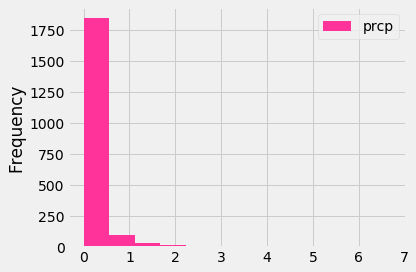

<Figure size 432x288 with 0 Axes>

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Plot the results as a histogram with `bins=12`.
prcp_df.plot.hist(bins=12, color ='#ff3399')
plt.tight_layout()
plt.show()
plt.savefig('station_temp.png')

## Bonus Challenge Assignment

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

# function usage example


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [17]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)


In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
